# Maternal Mortality information sourced from USA Today

https://www.usatoday.com/list/news/investigations/maternal-mortality-by-state/7b6a2a48-0b79-40c2-a44d-8111879a8336/?block=alabama

We broke down the data from a September USA TODAY investigation, identifying birth rates in 2016, death rates from 2012 to 2016, and ranked the 46 states with available data. Here's how states are addressing maternal mortality — with #46 the best, and #1 the worst. 

In [24]:
import seaborn as sns
import pandas as pd

In [25]:
maternalMortality = pd.read_csv("../raw_data/maternalMortalityState.csv")
statefips = pd.read_csv("../data/state_fips.csv")

In [26]:
maternalMortality.rename(columns={'maternalMortalityRate': 'Maternal Deaths Per 100,000 Births'}, inplace=True)
abortion = pd.read_csv("../data/abortion-paid-leave.csv")

In [27]:
maternalMortality = pd.merge(maternalMortality, abortion, on = "State", how = "inner")
maternalMortality = maternalMortality[["State", "Maternal Deaths Per 100,000 Births", "Abortion Overview"]]
maternalMortality = maternalMortality.sort_values('Maternal Deaths Per 100,000 Births', ascending = False)
maternalMortality = maternalMortality.dropna()

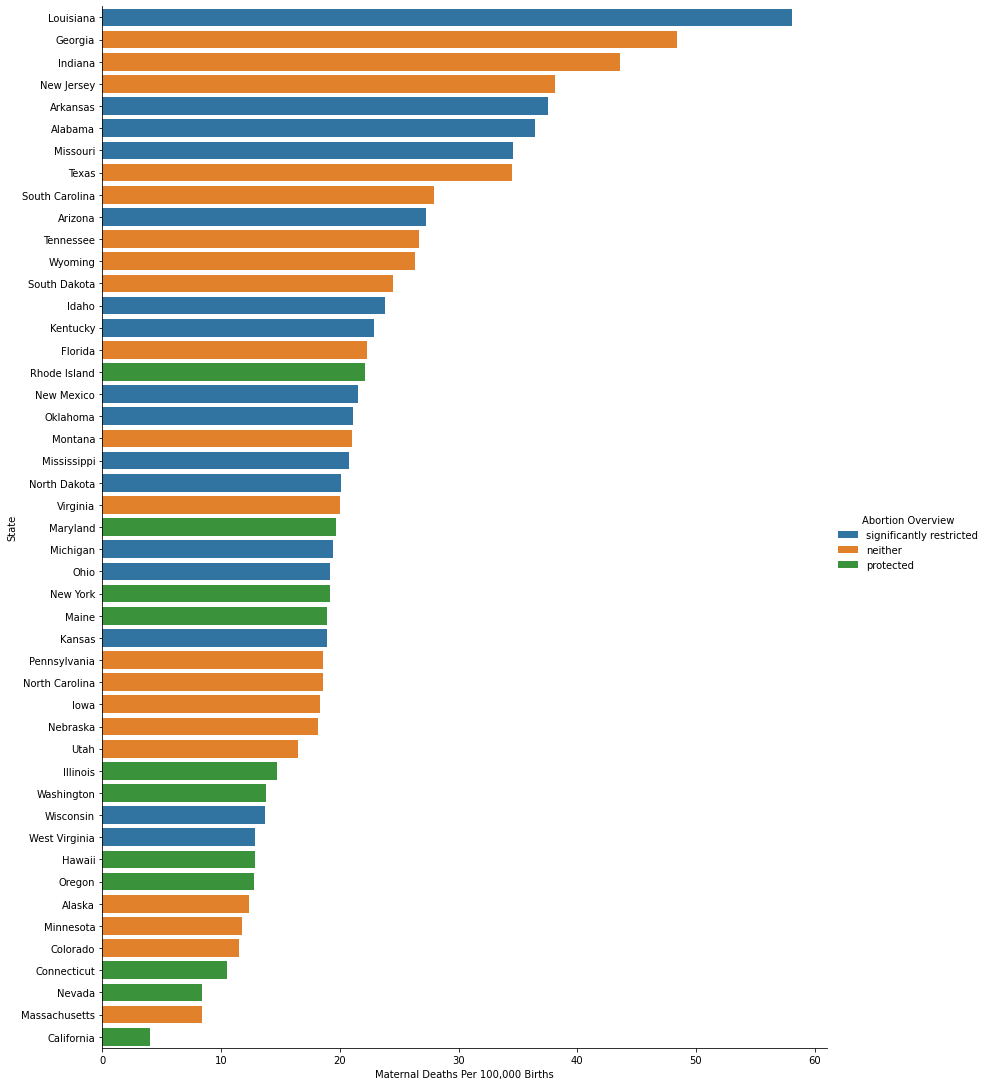

In [28]:
sns.catplot(y="State", x = "Maternal Deaths Per 100,000 Births",
           kind = "bar", data = maternalMortality,
            height=15, aspect=11.7/15, hue="Abortion Overview", dodge=False)

The states with the lowest maternal mortality rates tend to be ones with a protected abortion status. Those with a significantly restricted or ambiguous abortion status don't have significant trends in their maternal mortality rates.

In [29]:
maternalMortality = pd.merge(maternalMortality, statefips, left_on = "State", right_on = "STATE", how = "inner").drop(['STATE'], axis=1)

In [30]:
#maternalMortality.to_csv("../data/maternal_mortality_state.csv", index = False)

# Expecting Better: A State-by-State Analysis of Parental Leave Policies

It is the most comprehensive state-by-state analysis of laws, programs and policies regarding maternity and paternity leave produced to date.

https://www.leg.state.nv.us/App/NELIS/REL/79th2017/ExhibitDocument/OpenExhibitDocument?exhibitId=29512&fileDownloadName=0330ab266_ParentalLeaveReportMay05.pdf

25 points were awarded to each state with a program that provides paid parental leave to new
parents caring for newborns, newly adopted children or newly placed foster children.

20 points were awarded to each state with a program that provides paid medical leave for
new birth moms placed on pregnancy disability leave (bed rest) and for recovery after childbirth. 

15 points were awarded to states that allow workers to use accrued paid leave to care for a
new child or a spouse/partner with a maternity disability.

15 points were awarded to states with At-Home Infant Care (AHIC) programs. (AHIC)
programs provide eligible, lower-income working parents with some wage replacement to
provide care for their newborns or newly adopted children.

25 points were awarded to states that provide additional job protection, broader than that
provided by the federal FMLA, to new parents caring for infants.

20 points were awarded to states that provide job protection to women for pregnancy-related disabilities and recovery from childbirth that is more expansive than the federal FMLA. 

20 points were awarded to states that give workers a longer period of job-protected leave to
care for new babies or recover from maternity disability than the federal FMLA.

10 points were awarded to states that have their own family and medical leave laws addressing parental leave.

15 points were awarded to states that provide their own employees with paid family and/or
medical leave that covers pregnancy disability and recovery from childbirth.

10 points were awarded to states that provide their own employees with more than 12 weeks
of job-protected parental leave.

In [33]:
leaveRankings = pd.read_csv("../data/parentalLeaveRankings.csv")
leaveRankings = pd.merge(leaveRankings, abortion, on = "State", how = "inner")
leaveRankings = leaveRankings[["State", "Score", "Grade", "Abortion Overview"]]
leaveRankings["Score"] = leaveRankings["Score"] + 10

Let us displace all the bars by 10, so we can see the colors of bars that are 0.

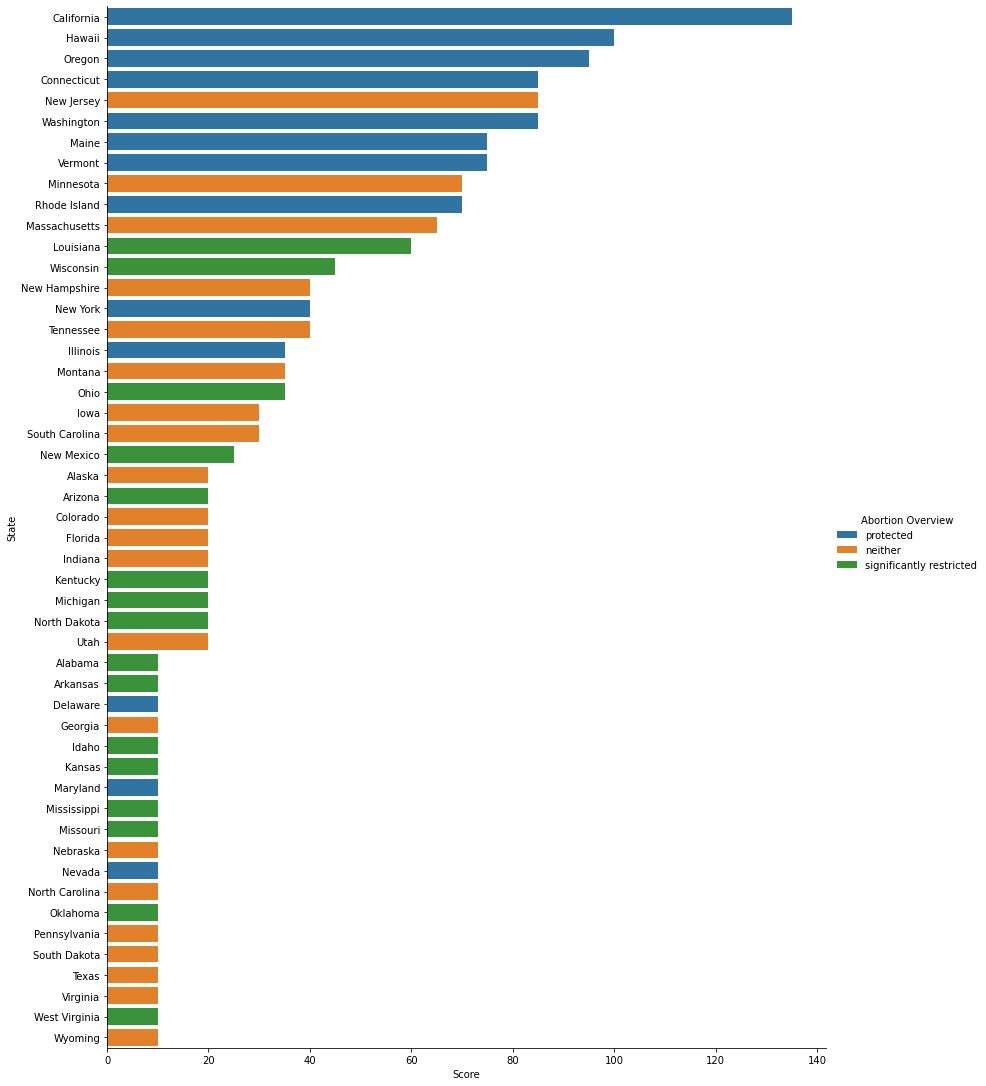

In [34]:
sns.catplot(y="State", x = "Score",
           kind = "bar", data = leaveRankings,
            height=15, aspect=11.7/15, hue="Abortion Overview", dodge=False)

The states with the highest parental leave scores are states with protected abortion statuses. The states with the lowest scores tend to be the ones with ambiguous abortion laws.

In [35]:
leaveRankings = pd.merge(leaveRankings, statefips, left_on = "State", right_on = "STATE", how = "inner").drop(['STATE'], axis=1)

In [37]:
#leaveRankings.to_csv("../data/parental_leave_rankings.csv", index = False)